# INTRODUCTION
The sinking of Titanic is one of the most notorious shipweredcks in the history. In 1912, during her voyage, the titanic sank after an iceborg, killing 1502 out of 2224 passengers and crew.

Content:
1. [Load and Check Data](#1)
1. [Veriable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Dedection](#7)
1. [Missing Value (NAN-Values)](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between SibSp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Value](#20)

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter

In [8]:
#plt.style.available 

<a id="1"><br>
## Load and Check Data

In [10]:
train_df = pd.read_csv("titanic_csv/train.csv")
test_df = pd.read_csv("titanic_csv/test.csv")
test_PassengerId = test_df["PassengerId"]

In [11]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2" style="text-decoration:none"><br>
## Veriable Description
<br>
    
1. PassengerId : unique id number to each passenger
1. Survived : passenger of survive(1) or died(0)
1. Pclass : Class of passenger
1. Name : Name of passenger
1. Sex : Gender of passenger
1. Age : Age of passenger
1. SibSp : Number of siblings/spouses
1. Parch : Number of parent/children
1. Ticket : Ticket number of passengers
1. Fare : amount of money spent on ticket
1. Cabin : Cabin category of passengers
1. Embarked : port where passangers embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare and Age
* int64(5): PassengerId, Survived, Pclass, SibSp, Pacrh
* object(5): Name, Sex, Ticket, Cabin, Embarked

<a id="3" style="text-decoration:none"><br>
# Univariate Variable Analysis
    
* Categorical Veriable : Survived, Sex, Pclass, Embarked, Cabin, Name, Ticked, SibSp and Parch.
* Numerical Veriable : Age, Fare, and PassengerId.

<a id="4" style="text-decoration:none"><br>
# Categorical Variable 

In [51]:
def bar_plot(veriable):
    """
        input : veriable ex : "Sex"
        output : bar plot & value count
    """
    # get feature
    var = train_df[veriable]
    # count number of categorical veriable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(veriable)
    plt.show()
    print("{} : \n {}".format(veriable,varValue))

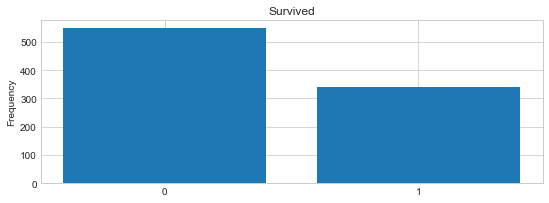

Survived : 
 0    549
1    342
Name: Survived, dtype: int64


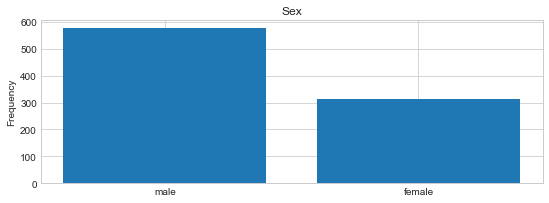

Sex : 
 male      577
female    314
Name: Sex, dtype: int64


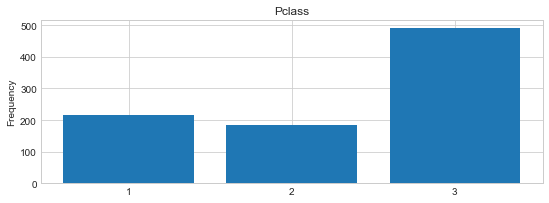

Pclass : 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


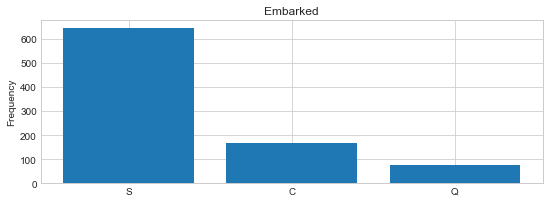

Embarked : 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


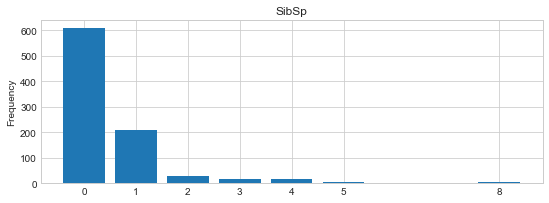

SibSp : 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


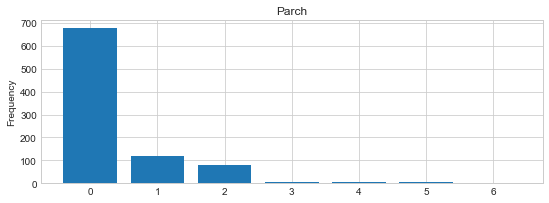

Parch : 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [52]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [25]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
C23 C25 C27    4
G6             4
D              3
C22 C26        3
              ..
B38            1
E49            1
A19            1
D46            1
C70            1
Name: Cabin, Length: 147, dtype: int64 

Clarke, Mrs. Charles V (Ada Maria Winfield)                            1
Rouse, Mr. Richard Henry                                               1
LeRoy, Miss. Bertha                                                    1
Williams, Mr. Howard Hugh "Harry"                                      1
Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")    1
                                                                      ..
West, Mrs. Edwy Arthur (Ada Mary Worth)                                1
Coleff, Mr. Peju                                                       1
Connors, Mr. Patrick                                                   1
Somerton, Mr. Francis William                                          1
Renouf, Mrs. Peter Henry (Lillian Jefferys

<a id="5" style="text-decoration:none"><br>
# Numerical Variable 

In [33]:
def plot_hist(veriable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[veriable], bins=50)
    plt.xlabel(veriable)
    plt.ylabel("Frequency")
    plt.title(" %s distribution with hist"%(veriable))

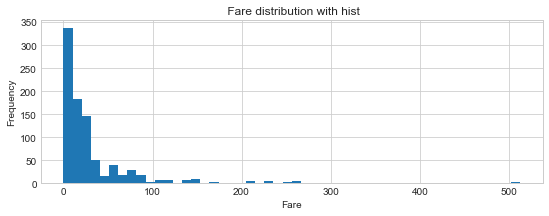

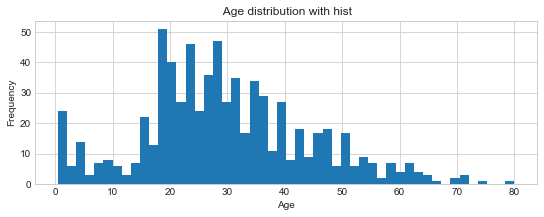

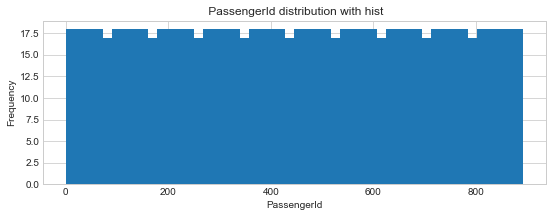

In [34]:
numericVar=["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id="6" style="text-decoration:none"><br>
# Basic Data Analysis
<br>
    
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [38]:
train_df[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [39]:
# Pclass - Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [40]:
# Sex - Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [42]:
# SibSp - Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [43]:
# Parch - Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id="7" style="text-decoration:none"><br>
# Outlier Dedection
<br>



In [59]:
def dedect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # Firs quartile
        Q1 = np.percentile(df[c],25)
        # Third quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # Dedect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [60]:
train_df.loc[dedect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [62]:
# drop outliers
train_df = train_df.drop(dedect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

In [63]:
train_df.loc[dedect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="8" style="text-decoration:none"><br>
# Missing Value (NAN-Values)


In [68]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [69]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="9" style="text-decoration:none"><br>
# Find Missing Value

In [70]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [71]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id="10" style="text-decoration:none"><br>
# Fill Missing Value
* Embarked has 2 missing values.
* Fare has only missing value.

In [72]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

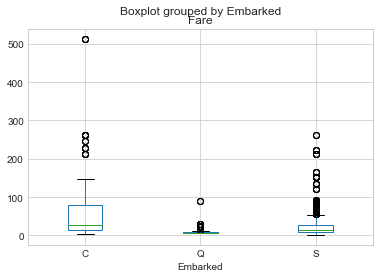

In [73]:
train_df.boxplot(column="Fare",by="Embarked")

In [75]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [76]:
# Fare missing value
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [82]:
mean = np.mean(train_df[train_df["Pclass"]==3]["Fare"])
mean

12.741219971469327

In [84]:
train_df["Fare"] = train_df["Fare"].fillna(mean)
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="20" style="text-decoration:none"><br>
# Fill Missing: Age Value

In [123]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


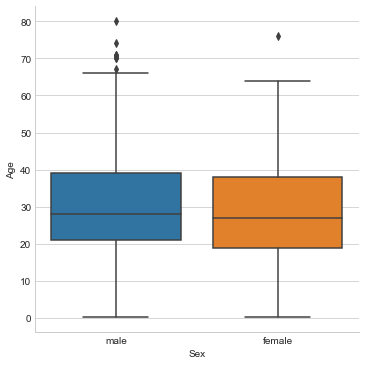

In [124]:
sns.catplot(x="Sex",y="Age",data = train_df, kind="box")
plt.show()

* Sex is not informative for age prediction, age distribution seems to be same.

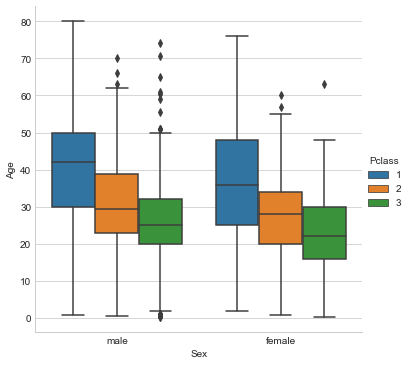

In [126]:
sns.catplot(x="Sex",y="Age",hue="Pclass",data = train_df, kind="box")
plt.show()

* First class passengers are older than than 2nd class and 2nd class is older than 3rd class.

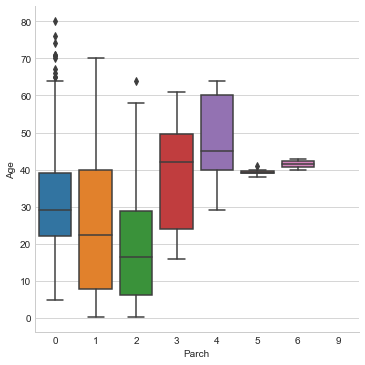

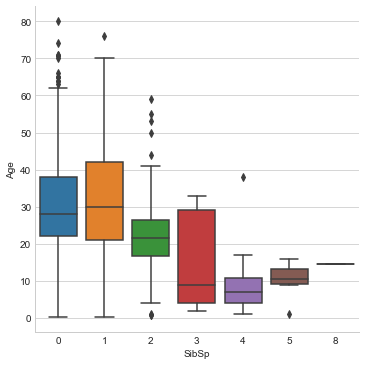

In [127]:
sns.catplot(x="Parch",y="Age",data = train_df, kind="box")
sns.catplot(x="SibSp",y="Age",data = train_df, kind="box")
plt.show()

In [130]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

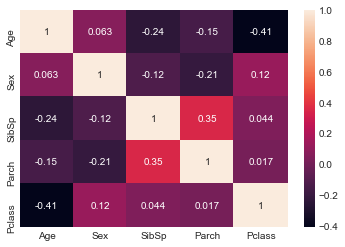

In [131]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

* Age is not correlated with sex but it is correlated Parch, SibSp and Pclass.

In [138]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][(train_df["SibSp"]==train_df.iloc[i]["SibSp"]) & (train_df["Parch"]==train_df.iloc[i]["Parch"])&(train_df["Pclass"]==train_df.iloc[i]["Pclass"])].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

/home/ea/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/ea/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [139]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [134]:
age_pred

<bound method NDFrame._add_numeric_operations.<locals>.median of 10       4.00
64        NaN
126       NaN
169      1.00
172     18.00
184     40.00
246     29.00
274     35.00
322     31.00
341      3.00
345     15.00
416     28.00
417     18.00
482      9.00
525     17.00
541     33.00
588     36.00
609     34.00
615     20.00
650     32.00
702       NaN
739     16.00
791     30.00
843      9.00
859      4.00
885     22.00
961      6.00
985     16.00
998      1.00
1042     7.00
1046    26.00
1073    11.50
1144     1.00
1162     0.75
1164     9.00
1165     2.00
1214    19.00
1225      NaN
1290     3.00
1298      NaN
Name: Age, dtype: float64>

<a id="11" style="text-decoration:none"><br>
# Visualization

<a id="12" style="text-decoration:none"><br>
# Correlation Between SibSp -- Parch -- Age -- Fare -- Survived

<AxesSubplot:>

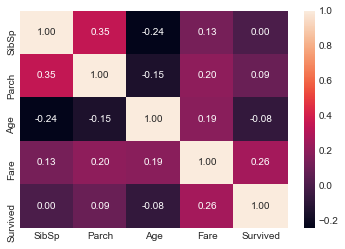

In [88]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot=True, fmt = ".2f")

Fare feature seems to have correlation with survived feature (0.26).

<a id="13" style="text-decoration:none"><br>
# SibSp -- Survived

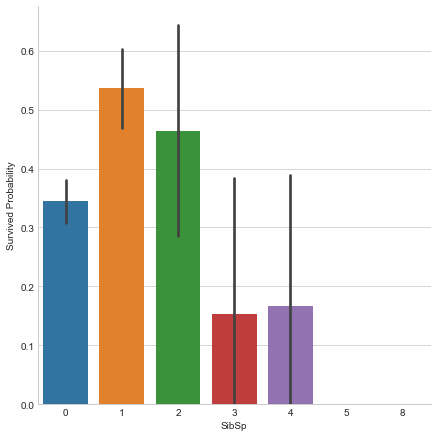

In [92]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", height = 6)
g.set_ylabels("Survived Probability")
plt.show()

+ Havinga lot of SibSp have less chance to Survive.
+ If SibSp == 0 or 1 or 2, passanger has more chance to Survive.
+ We can consider a new feature describing these categories.

<a id="14" style="text-decoration:none"><br>
# Parch -- Survived

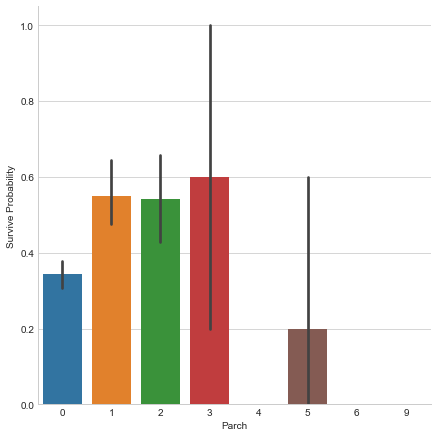

In [96]:
g = sns.catplot(x = "Parch", y = "Survived", data = train_df, kind = "bar", height = 6)
g.set_ylabels("Survive Probability")
plt.show()

* SibSp and Parch can be used for new feature extraction with th = 3
* Small families have more chance to survive.
* There is a std in survival of passanger with parch = 3

<a id="15" style="text-decoration:none"><br>
# Pclass -- Survived

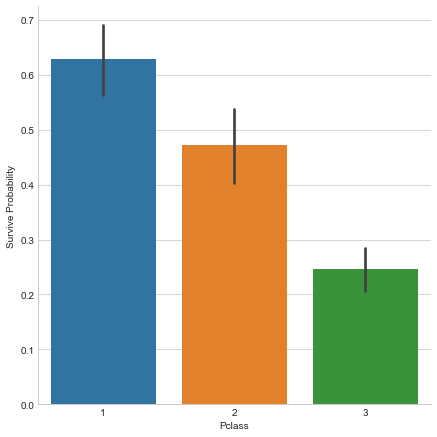

In [108]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", height = 6)
g.set_ylabels("Survive Probability")
plt.show()

<a id="16" style="text-decoration:none"><br>
# Age -- Survived

/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


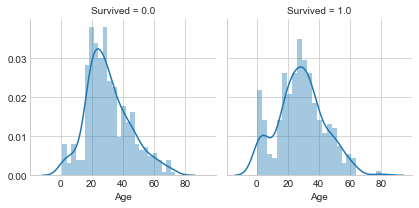

In [113]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passangers are in 15-35 age range.
* use age feauture  in training
* use age distributton for missing value of age

<a id="17" style="text-decoration:none"><br>
# Pclass -- Survived -- Age

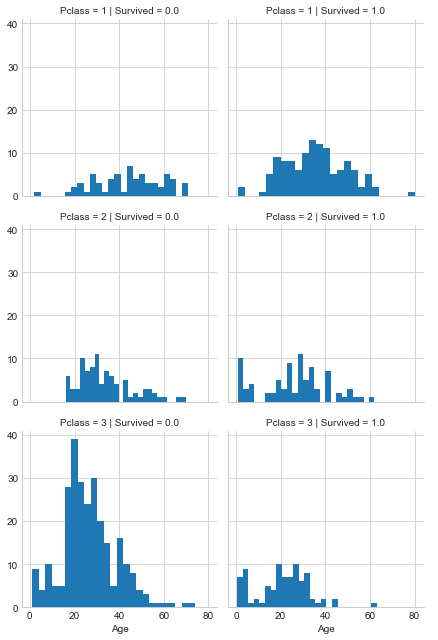

In [115]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

* Pclass is impartant feature for model traning

<a id="18" style="text-decoration:none"><br>
# Embarked -- Sex -- Pclass -- Survived

/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


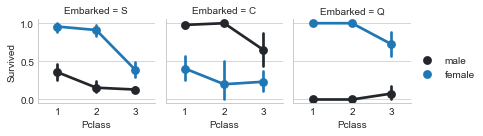

In [117]:
g = sns.FacetGrid(train_df, col="Embarked", size=2)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* Males have better survival rate in pclass 3 in C.
* Embarked and sex will be used in training.

<a id="19" style="text-decoration:none"><br>
# Embarked -- Sex -- Fare -- Survived

/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ea/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


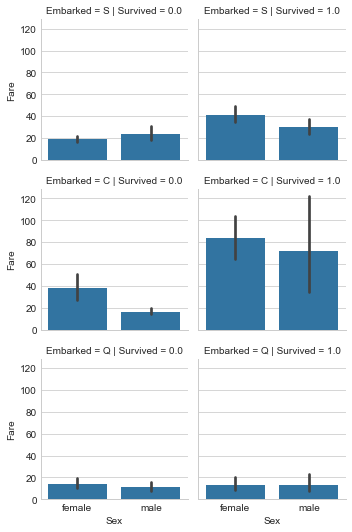

In [120]:
g = sns.FacetGrid(train_df, row = "Embarked", col="Survived" , size = 2.5)
g.map(sns.barplot, "Sex","Fare")
plt.show()

* Passengers who pay higher fare have better survival.
* Fare can be used as categorical for training